# Rana's Experiments

In [9]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import warnings
from PIL import Image
warnings.filterwarnings("ignore")

In [3]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.class_to_idx = {}
        for i, cls in enumerate(self.classes):
            self.class_to_idx[cls] = i
        self.images = self._load_images()
    
    def __len__(self):
        return len(self.images)
    
    def _load_images(self):
        images = []
        for cls in self.classes:
            dir = os.path.join(self.root_dir, cls)
            for img_name in os.listdir(dir):
                img = os.path.join(dir, img_name)
                images.append((img, self.class_to_idx[cls]))
        return images
    
    def __getitem__(self, idx):
        img_path, label = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

In [6]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])
dataset = CustomDataset(r'C:\Users\ronyf\Computer-Vision-Repository\midterm prep\TestFiles-Rana\Dataset', transform=transform)

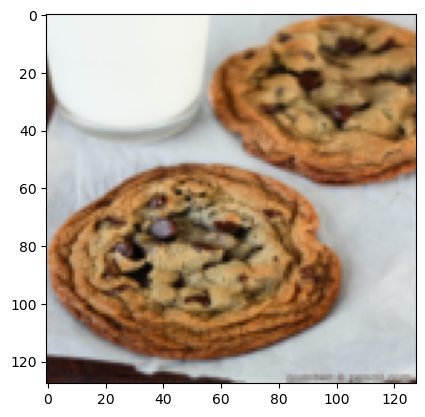

In [8]:
transform_back = transforms.Compose([transforms.Normalize((-1.,-1.,-1.),(2.,2.,2.)), transforms.ToPILImage()])

plt.imshow(transform_back(dataset[0][0]));